In [172]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) #设置一个固定的随机种子，以保证接下来的步骤中我们的结果是一致的。

In [30]:
X, Y = load_planar_dataset()

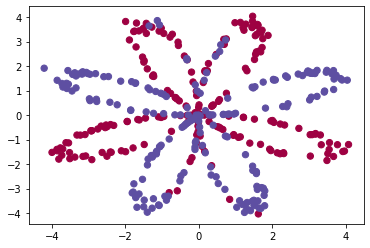

In [3]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral) #绘制散点图

In [4]:
X.shape,Y.shape

((2, 400), (1, 400))

In [5]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegressionCV()

逻辑回归的准确性： 47 % (正确标记的数据点所占的百分比)


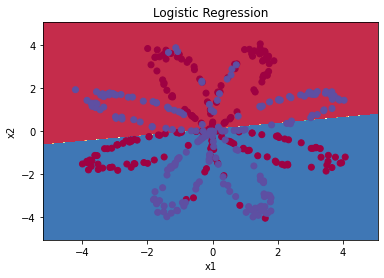

In [6]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y) #绘制决策边界
plt.title("Logistic Regression") #图标题
LR_predictions  = clf.predict(X.T) #预测结果
print ("逻辑回归的准确性： %d " % float((np.dot(Y, LR_predictions) 
       + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) 
       + "% " + "(正确标记的数据点所占的百分比)")

In [31]:
# layer 1
W1 = np.random.randn(4,2)
b1 = np.random.randn(4,1)

Z1 = np.dot(W1,X) + b1
A1 = np.tanh(Z1)

In [33]:
# layer 2
W2 = np.random.randn(1,4)
b2 = np.random.randn(1,1)

Z2 = np.dot(W2,A1) + b2
A2 = sigmoid(Z2)

In [47]:
m = Y.shape[1]
logprobs = - np.multiply(np.log(A2), Y) - np.multiply((1 - Y), np.log(1 - A2))
cost = np.sum(logprobs)/m

In [80]:
dZ2 = A2-Y
dW2 = np.dot(dZ2,A1.T)/m
db2 = np.sum(dZ2,axis = 1,keepdims=True)/m
dA1 = np.dot(W2.T,dZ2)

In [73]:
dZ1 = np.multiply(dA1,1-np.power(A1,2))
dW1 = np.dot(dZ1,X.T)/m
db1 = np.sum(dZ1,axis = 1,keepdims=True)/m

In [84]:
W2 = W2 - dW2
b2 = b2 - db2

W1 = W1 - dW1
b1 = b1 - db1

# 以上代码就完成了一个两层神经网络前向传播和反向传播，接下来把这些写成方法然后循环

(4, 400)

In [170]:
def init_parameters(L):
    '''
    l:layer列表 [4,2,1] 0位置为输入维度，1-最后位置为每层神经元个数
    '''
    
    np.random.seed(2)
    n_L = len(L)
    parameters = {}
    for i in range(1,n_L):
        parameters['W'+str(i)] = np.random.randn(L[i],L[i-1]) * 0.01
        parameters['b'+str(i)] = np.zeros((L[i],1))
    return parameters

In [102]:
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)

    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return cache

In [90]:
def compute_cost(A2,Y):
    m = Y.shape[1]
    logprobs = - np.multiply(np.log(A2), Y) - np.multiply((1 - Y), np.log(1 - A2))
    cost = np.sum(logprobs)/m
    return cost

In [91]:
def back_propagation(X,Y,parameters,cache):
    m = Y.shape[1]
    A2 = cache['A2']
    A1 = cache['A1']
    W2 = parameters['W2']
    
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis = 1,keepdims=True)/m
    dA1 = np.dot(W2.T,dZ2)
    
    dZ1 = np.multiply(dA1,1-np.power(A1,2))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis = 1,keepdims=True)/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2 }
    
    return grads

In [109]:
def update_parameters(parameters,grads,learning_rate = 0.05):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W2 = W2 - dW2 * learning_rate
    b2 = b2 - db2 * learning_rate

    W1 = W1 - dW1 * learning_rate
    b1 = b1 - db1 * learning_rate
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    return parameters

In [169]:
def model(X,Y,num_iterations = 1000,learning_rate = 0.5,print_cost = 0):
    
    np.random.seed(3)
    parameters = init_parameters([2,4,1])
    costLs = []
    for i in range(num_iterations):
        cache = forward_propagation(X,parameters)
        cost = compute_cost(cache['A2'],Y)
        grads = back_propagation(X,Y,parameters,cache)
        parameters = update_parameters(parameters,grads,learning_rate)
        if print_cost > 0 and i %print_cost == 0:
            print(i,"--cost:",cost)
    print("end --cost:",cost)
    return parameters
        

In [148]:
def predict(X,parameters,threshold = 0.5):
    cache = forward_propagation(X,parameters)
    A2 = cache['A2']
    for i,v in enumerate(A2.squeeze()):
        if v >= threshold :
            A2[0,i] = 1
        else:
            A2[0,i] = 0
    return A2

In [175]:
parameters = model(X,Y,num_iterations= 10000,learning_rate=0.5,print_cost= 1000)
y_pred = predict(X,parameters)
print("准确率:",np.sum(y_pred == Y)/Y.shape[1])

0 --cost: 0.6930480201239823
1000 --cost: 0.3098018601352803
2000 --cost: 0.2924326333792647
3000 --cost: 0.2833492852647412
4000 --cost: 0.27678077562979253
5000 --cost: 0.2634715508859305
6000 --cost: 0.24204413129940755
7000 --cost: 0.23552486626608762
8000 --cost: 0.2314096450985427
9000 --cost: 0.22846408048352362
end --cost: 0.22618800143746093
准确率: 0.905


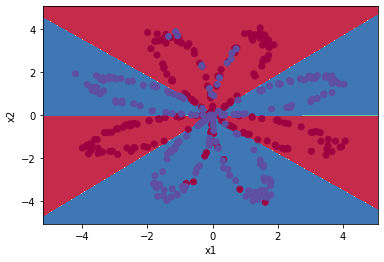

In [193]:
plot_decision_boundary(lambda x: predict(x.T,parameters), X, Y)